In [3]:
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as shpg
from scipy.interpolate import griddata
import pyproj
import salem
%matplotlib inline

In [4]:
# make a salem grid
proj = pyproj.Proj('+proj=merc +lat_0=0. +lon_0=0.')
grid = salem.Grid(nxny=(800, 500), dxdy=(5000, 5000), ll_corner=(-2200000., -100000.), proj=proj)

In [5]:
# Generate random data
ndata = 100
lons = 25 * np.random.random(ndata) - 15
lats = 15 * np.random.random(ndata)
data = lons + 2*lats

In [6]:
# Transform lons, lats to grid
x, y = grid.transform(lons, lats, crs=salem.wgs84)

In [7]:
# Grid x, y
xi, yi = grid.ij_coordinates

In [8]:
# Convert for griddata input 
points = np.array((y, x)).T
inter = np.array((np.ravel(yi), np.ravel(xi))).T

In [15]:
# Interpolate using delaunay triangularization 
out = griddata(points, data, inter, method='nearest')
out = out.reshape((grid.ny, grid.nx))

In [ ]:
mask=np.

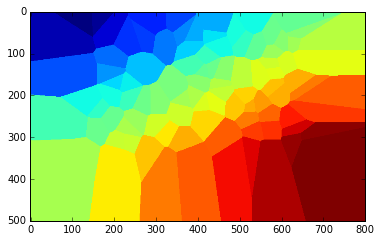

In [16]:
plt.imshow(out)